In [1]:
from molmass import Formula
import numba as nb
import numpy as np
import pyteomics.mgf
from tqdm import tqdm
import pandas as pd

from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import CalcMolFormula

# Remove
import sys 
import importlib
from itertools import combinations

sys.path.append("../src/")
from ms_similarity_metrics import frequency
from ms_similarity_metrics import similarity_weighted as similarity
importlib.reload(frequency)
importlib.reload(similarity)

import spectrum_utils.plot as sup
import spectrum_utils.spectrum as sus

# Get Wout data

In [2]:
# Profile spectra contain 0 intensity values.
@nb.njit
def is_centroid(intensity_array):
    return np.all(intensity_array > 0)

In [2]:
# Read all spectra from the MGF.
spectra = []

# Download from https://zenodo.org/record/6829249/files/ALL_GNPS_NO_PROPOGATED.mgf?download=1
filename = ("/Users/danieldomingo/Downloads/slide_15_better_with_weights.mgf")

# Get wout spectra
with pyteomics.mgf.MGF(filename) as f_in:
    for spectrum_dict in tqdm(f_in):
        spectra.append(spectrum_dict)

10it [00:00, 482.09it/s]


In [18]:
def prepare_spectrum(spectrum):

    spec = sus.MsmsSpectrum(
        spectrum["params"]["spectrumid"],
        float(spectrum["params"]["pepmass"][0]),
        # Re-assign charge 0 to 1.
        max(int(spectrum["params"]["charge"][0]), 1),
        spectrum["m/z array"],
        spectrum["intensity array"] / spectrum["intensity array"].sum(),
    )
    spec.library = spectrum["params"]["organism"]
    spec.inchi = spectrum["params"]["inchi"]
    spec.smiles = spectrum["params"]["smiles"]
    # spec.remove_precursor_peak(0.1, "Da")
    # spec.filter_intensity(0.01)
    return spec

In [19]:
# iterate over all combinations of spectra
for spec1, spec2 in combinations(spectra, 2):

    spec1 = prepare_spectrum(spec1)
    spec2 = prepare_spectrum(spec2)

    score1 = similarity.modified_cosine(
        spectrum1=spec1,
        spectrum2=spec2,
        fragment_mz_tolerance=0.1,
    )

    score2 = cosine(
        spec=spec1,
        spec_other=spec2,
        fragment_mz_tolerance=0.1,
        allow_shift=True,
    )

    print(score1.score, score2[0])

0.9925367876183069 0.09328507743191783
0.06930093637545554 0.004128863280617678
0.05190528753337276 0.003947580907291415
0.022551410388302884 0.0021886183709192153
0.004333320557179832 0.0009008675452548687
0.03414350365254393 0.0025242168174699486
0.001142886554589495 0.00023388383306155447
0.04687660991078246 0.003965099165824881
0.01791026283649444 0.002015984268624038
0.08073137461951863 0.0042748870518673765
0.060088586780916664 0.00406891526545658
0.025316239210596336 0.0021834345893818607
0.003263920172997814 0.0006030097204643425
0.03851256345343046 0.00253026291962799
0.0008700867974766879 0.0001582356529183926
0.05185200941673429 0.0038976971996973475
0.02074579066379556 0.0020751994067111923
0.9723601388428698 0.04188305236593179
0.04302859079732002 0.002357008314650244
0.009073302514281067 0.001064665451471214
0.10133544402552275 0.004228512276561958
0.0008790453102847096 0.00010153505718335509
0.0930049175646559 0.00444029081957531
0.06635175674080074 0.004215462718995866


In [20]:
spec1.intensity

array([0.00256679, 0.00190163, 0.00326252, 0.00930169, 0.00529017,
       0.00310903, 0.02056985, 0.00110793, 0.00868265, 0.01664406,
       0.02674256, 0.00205296, 0.02276764, 0.00409858, 0.00166966,
       0.0020874 , 0.00196534, 0.01518294, 0.05482521, 0.0115183 ,
       0.01145045, 0.00781291, 0.00291442, 0.00869065, 0.01850005,
       0.01644069, 0.00246901, 0.00695596, 0.00813203, 0.0021401 ,
       0.03587467, 0.01602897, 0.0044639 , 0.00850535, 0.00168829,
       0.00093552, 0.0010988 , 0.00317952, 0.0078561 , 0.00821315,
       0.00535105, 0.00126274, 0.01645377, 0.23867196, 0.0024149 ,
       0.00534588, 0.00502704, 0.00807848, 0.00855382, 0.00270597,
       0.00638435, 0.00211253, 0.00168199, 0.00389474, 0.00745257,
       0.00516303, 0.00401623, 0.0011228 , 0.00770224, 0.00470745,
       0.00642746, 0.00340133, 0.00571083, 0.00148483, 0.00604425,
       0.00600068, 0.00164707, 0.00138319, 0.00341328, 0.00228729,
       0.00183275, 0.00347737, 0.00124768, 0.00516604, 0.00441

In [21]:
spec1.intensity.sum()

1.0

In [14]:
sum(spec2.intensity)

0.735365267843008

In [20]:
assert score.matched_indices.size == score.matched_indices_other.size, 'same size'

In [21]:
spec1.mz[score.matched_indices]

array([ 81.070053,  83.049316,  85.06501 ,  95.08564 ,  97.064796,
       107.085472, 109.064697, 109.101196, 119.085533, 121.064789,
       121.100922, 123.080368, 131.085617, 133.101257, 135.080246,
       135.116577, 137.096161, 143.085587, 145.101044, 147.080261,
       147.116653, 149.096176, 157.101044, 159.116928, 161.096146,
       163.111725, 171.116653, 173.095673, 173.132431, 175.111771,
       177.127274, 183.116776, 185.132431, 187.112076, 187.147705,
       189.126984, 195.116791, 197.132507, 199.112732, 199.14769 ,
       201.127197, 211.147736, 213.127609, 213.163849, 215.179993,
       217.158112, 225.127151, 225.163437, 227.143402, 229.158646,
       231.174133, 237.16362 , 239.142685, 243.173477, 251.179077,
       253.159958, 253.19458 , 255.173889, 267.17392 , 267.21051 ,
       269.189392, 271.205475, 285.185516, 295.205261, 313.215729])

In [22]:
spec2.mz[score.matched_indices_other]

array([ 81.070099,  83.049316,  85.064957,  95.085587,  97.064796,
        79.054443, 109.101143, 109.064796,  91.054222,  93.069931,
       121.064781, 123.080353, 131.08551 , 105.069817, 135.116516,
       107.085442, 137.096039, 143.08548 , 145.101074, 147.116669,
       119.085457, 121.101089, 157.10112 , 159.116699, 133.101135,
       135.080368, 171.116638, 173.096298, 173.132339, 175.111664,
       177.127228, 155.085312, 185.095703, 187.111618, 159.080353,
       161.096054, 195.116745, 169.101212, 199.111389, 199.147522,
       201.12793 , 183.116455, 213.163651, 185.132431, 187.147858,
       189.127319, 225.126831, 197.132187, 227.143204, 201.163681,
       203.142624, 209.132385, 211.147552, 215.142578, 251.178864,
       253.158707, 225.163544, 227.179092, 267.173889, 239.178101,
       269.18924 , 243.174301, 257.153595, 267.210083, 285.220673])

In [33]:
spec1_aligned = sus.MsmsSpectrum(
    identifier=spec1.identifier,
    precursor_mz=spec1.precursor_mz,
    precursor_charge=spec1.precursor_charge,
    mz=spec1.mz[score.matched_indices],
    intensity=spec1.intensity[score.matched_indices],
    retention_time=spec1.retention_time,
)

spec2_aligned = sus.MsmsSpectrum(
    identifier=spec2.identifier,
    precursor_mz=spec2.precursor_mz,
    precursor_charge=spec2.precursor_charge,
    # mz=spec1.mz[score.matched_indices],
    mz=spec2.mz[score.matched_indices_other],
    intensity=spec2.intensity[score.matched_indices_other],
    retention_time=spec2.retention_time,
)

<Axes: xlabel='m/z', ylabel='Intensity'>

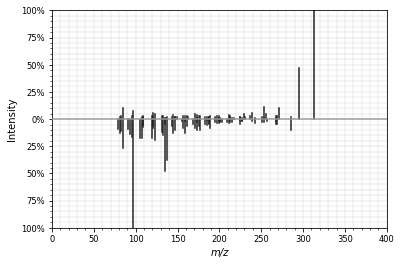

In [34]:
sup.mirror(spec1_aligned, spec2_aligned)

<Axes: xlabel='m/z', ylabel='Intensity'>

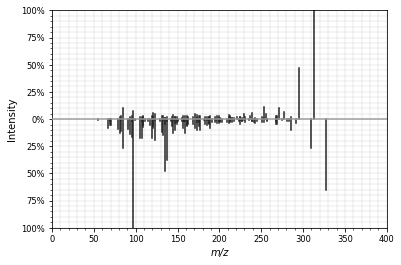

In [28]:
sup.mirror(spec1, spec2)

In [5]:
import collections
from typing import List, Tuple

import numba as nb
import numpy as np
import pandas as pd

PSEUDO_CHARGE = 1

##### Numpy-enabled spectra
SpectrumTuple = collections.namedtuple(
    "SpectrumTuple", ["precursor_mz", "precursor_charge", "mz", "intensity"]
)


##### Cosine Metric
def _norm_intensity(spectrum_intensity: np.ndarray) -> np.ndarray:
    """
    Normalize spectrum peak intensities by their vector norm.
    Parameters
    ----------
    spectrum_intensity : np.ndarray
        The spectrum peak intensities to be normalized.
    Returns
    -------
    np.ndarray
        The normalized peak intensities.
    """
    return spectrum_intensity / np.linalg.norm(spectrum_intensity)


def mass_diff(mz1, mz2, mode_is_da):
    """
    Calculate the mass difference(s).
    Parameters
    ----------
    mz1
        First m/z value(s).
    mz2
        Second m/z value(s).
    mode_is_da : bool
        Mass difference in Dalton (True) or in ppm (False).
    Returns
    -------
        The mass difference(s) between the given m/z values.
    """
    return mz1 - mz2 if mode_is_da else (mz1 - mz2) / mz2 * 10**6


def cosine(
    spec: SpectrumTuple,
    spec_other: SpectrumTuple,
    fragment_mz_tolerance: float,
    allow_shift: bool,
) -> Tuple[float, List[Tuple[int, int]]]:
    """
    Compute the cosine similarity between the given spectra.
    Parameters
    ----------
    spec : SpectrumTuple
        Numba-compatible tuple containing information from the first spectrum.
    spec_other : SpectrumTuple
        Numba-compatible tuple containing information from the second spectrum.
    fragment_mz_tolerance : float
        The fragment m/z tolerance used to match peaks in both spectra with
        each other.
    allow_shift : bool
        Boolean flag indicating whether to allow peak shifts or not.
    Returns
    -------
    Tuple[float, List[Tuple[int, int]]]
        A tuple consisting of (i) the cosine similarity between both spectra,
        and (ii) the indexes of matching peaks in both spectra.
    """

    # Find the matching peaks between both spectra, optionally allowing for
    # shifted peaks.
    # Candidate peak indices depend on whether we allow shifts
    # (check all shifted peaks as well) or not.
    # Account for unknown precursor charge (default: 1).
    precursor_charge = max(abs(spec.precursor_charge), 1)
    precursor_mass_diff = (
        spec.precursor_mz - spec_other.precursor_mz
    ) * precursor_charge
    # Only take peak shifts into account if the mass difference is relevant.
    num_shifts = 1
    if allow_shift and abs(precursor_mass_diff) >= fragment_mz_tolerance:
        num_shifts += precursor_charge
    other_peak_index = np.zeros(num_shifts, np.uint16)
    mass_diff = np.zeros(num_shifts, np.float32)
    for charge in range(1, num_shifts):
        mass_diff[charge] = precursor_mass_diff / charge

    # Find the matching peaks between both spectra.
    peak_match_scores, peak_match_idx = [], []
    for peak_index, (peak_mz, peak_intensity) in enumerate(
        zip(spec.mz, spec.intensity)
    ):
        # Advance while there is an excessive mass difference.
        for cpi in range(num_shifts):
            while other_peak_index[cpi] < len(spec_other.mz) - 1 and (
                peak_mz - fragment_mz_tolerance
                > spec_other.mz[other_peak_index[cpi]] + mass_diff[cpi]
            ):
                other_peak_index[cpi] += 1
        # Match the peaks within the fragment mass window if possible.
        for cpi in range(num_shifts):
            index = 0
            other_peak_i = other_peak_index[cpi] + index
            while (
                other_peak_i < len(spec_other.mz)
                and abs(peak_mz - (spec_other.mz[other_peak_i] + mass_diff[cpi]))
                <= fragment_mz_tolerance
            ):
                peak_match_scores.append(
                    peak_intensity * spec_other.intensity[other_peak_i]
                )
                peak_match_idx.append((peak_index, other_peak_i))
                index += 1
                other_peak_i = other_peak_index[cpi] + index

    score, peak_matches = 0.0, []
    if len(peak_match_scores) > 0:
        # Use the most prominent peak matches to compute the score (sort in
        # descending order).
        peak_match_scores_arr = np.asarray(peak_match_scores)
        peak_match_order = np.argsort(peak_match_scores_arr)[::-1]
        peak_match_scores_arr = peak_match_scores_arr[peak_match_order]
        peak_match_idx_arr = np.asarray(peak_match_idx)[peak_match_order]
        peaks_used, other_peaks_used = set(), set()
        for peak_match_score, peak_i, other_peak_i in zip(
            peak_match_scores_arr, peak_match_idx_arr[:, 0], peak_match_idx_arr[:, 1]
        ):
            if peak_i not in peaks_used and other_peak_i not in other_peaks_used:
                score += peak_match_score
                # Save the matched peaks.
                peak_matches.append((peak_i, other_peak_i))
                # Make sure these peaks are not used anymore.
                peaks_used.add(peak_i)
                other_peaks_used.add(other_peak_i)

    return score, peak_matches


In [43]:
score

(0.206759283944848,
 [(72, 107),
  (5, 14),
  (2, 9),
  (71, 102),
  (13, 27),
  (28, 33),
  (11, 11),
  (18, 36),
  (4, 13),
  (63, 86),
  (15, 16),
  (32, 40),
  (10, 24),
  (30, 56),
  (26, 51),
  (68, 95),
  (27, 32),
  (8, 6),
  (7, 18),
  (34, 61),
  (14, 30),
  (1, 7),
  (33, 42),
  (25, 48),
  (59, 79),
  (39, 68),
  (46, 63),
  (20, 23),
  (23, 26),
  (67, 103),
  (41, 55),
  (48, 65),
  (56, 76),
  (31, 58),
  (12, 25),
  (9, 20),
  (19, 38),
  (43, 74),
  (64, 88),
  (22, 41),
  (37, 66),
  (58, 78),
  (54, 72),
  (17, 34),
  (38, 67),
  (57, 77),
  (61, 97),
  (47, 81),
  (65, 101),
  (40, 70),
  (62, 98),
  (70, 99),
  (50, 82),
  (35, 46),
  (44, 57),
  (55, 87),
  (36, 64),
  (51, 83),
  (16, 17),
  (66, 93),
  (53, 85),
  (42, 73)])